In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.manifold import TSNE

import time
import math
from pathlib import Path

In [5]:
ls

2024_reference_tables/             README.md
PregMedNet_Functions.py            requirements.txt
PregMedNet_Interactive_Website.py  Test_Previous_Formulas.ipynb
__pycache__/


In [6]:
# kg_path = Path(__file__).parents[0] / '2024_reference_tables/kg.csv'
kg_path = '2024_reference_tables/kg.csv'

kg = pd.read_csv(kg_path)

/tmp/ipykernel_106622/3233079388.py:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  kg = pd.read_csv(kg_path)


In [7]:
kg

,Unnamed: 0,relation,display_relation,x_id,x_type,x_name,y_id,y_type,y_name
0,0,protein_protein,ppi,9796,gene/protein,PHYHIP,56992,gene/protein,KIF15
1,1,protein_protein,ppi,7918,gene/protein,GPANK1,9240,gene/protein,PNMA1
2,2,protein_protein,ppi,8233,gene/protein,ZRSR2,23548,gene/protein,TTC33
3,3,protein_protein,ppi,4899,gene/protein,NRF1,11253,gene/protein,MAN1B1
4,4,protein_protein,ppi,5297,gene/protein,PI4KA,8601,gene/protein,RGS20
...,...,...,...,...,...,...,...,...,...
2016013,2016013,bioprocess_protein,interacts with,32597,biological_process,B cell receptor transport into membrane raft,100133941,gene/protein,CD24
2016014,2016014,bioprocess_protein,interacts with,32600,biological_process,chemokine receptor transport out of membrane raft,100133941,gene/protein,CD24
2016015,2016015,bioprocess_protein,interacts with,51494,biological_process,negative regulation of cytoskeleton organization,100505385,gene/protein,IQCJ-SCHIP1
2016016,2016016,bioprocess_protein,interacts with,90133,biological_process,mesendoderm migration,100506013,gene/protein,APELA


## Test the previous dataframes

In [ ]:
pd.read_csv('CorALS_Final_CI_BH_Oct2022.csv').drop(columns=['Unnamed: 0']).head()

In [ ]:
pd.read_csv('OR_Logistic_Oct2022_CI.csv').drop(columns=['Unnamed: 0']).head()

,Disease,Medication,odds ratio,p-val,Count,95% CI
0,PTB,"1,1,1,3,3-Pentafluoropropane",NaN,NaN,0,"(nan, nan)"
1,Gastroschisis,"1,1,1,3,3-Pentafluoropropane",0.000671,0.997778,0,"(-5143.988425135758, 5143.989766157985)"
2,CHD,"1,1,1,3,3-Pentafluoropropane",0.000012,0.996734,0,"(-5412.195164330695, 5412.195188991585)"
3,LGA,"1,1,1,3,3-Pentafluoropropane",0.000015,0.987187,0,"(-1352.5267045018297, 1352.5267352803519)"
4,Postmaturity,"1,1,1,3,3-Pentafluoropropane",42.981854,0.007832,1,"(40.20993183467746, 45.753776393854565)"


In [ ]:
pd.read_csv('disease_tSNE_Oct2022.csv').drop(columns=['Unnamed: 0']).head()

,tsne-origin-one,tsne-origin-two,tsne-origin-one-modi,tsne-origin-two-modi,THRGRDS
0,258.070100,96.070420,412.912170,153.712680,Disease
1,-163.231190,-35.539610,-261.169900,-56.863380,Disease
2,-191.030610,61.426780,-305.649000,98.282850,Disease
3,1.047095,23.016235,1.675352,36.825977,Disease
4,31.500628,-45.451515,50.401005,-72.722430,Disease


In [ ]:
pd.read_csv('medication_tSNE_Oct2022.csv').drop(columns=['Unnamed: 0']).head()

,THRGRDS,tsne-origin-one,tsne-origin-two,tsne-origin-one-modi,tsne-origin-two-modi
0,Blood Form/Coagul Agents,76.882040,42.067387,76.882040,1242.0674
1,Blood Form/Coagul Agents,40.874580,85.296425,40.874580,1285.2964
2,Blood Form/Coagul Agents,40.547203,-76.290970,40.547203,1123.7090
3,Blood Form/Coagul Agents,80.316380,143.677300,80.316380,1343.6772
4,Blood Form/Coagul Agents,-10.316784,54.658290,-10.316784,1254.6583


## Test the 2024 version of the results

In [ ]:
node_df = pd.read_csv('2024_reference_tables/node_tsne.csv').set_index('node')


In [ ]:
raw_edge_df = pd.read_csv('2024_reference_tables/raw_edges.csv').drop(columns=['Unnamed: 0'],axis=1)


In [ ]:
adj_edge_df = pd.read_csv('2024_reference_tables/adj_edges.csv').drop(columns=['Unnamed: 0'],axis=1)


In [ ]:
raw_edge_df ## need to add 95% CI LL and UL ## --> not a problem! ;)

,Disease,Medication,odds ratio,p-val,weight,weight_modi,color,color_clicked
0,NAS_Baby,"Buprenorphine, Sublingual",551.128439,0.000000e+00,inf,9.511516,#c9c9c9,#FF0000
1,RDS_Baby,"Labetalol, Oral",4.026080,0.000000e+00,inf,9.511516,#c9c9c9,#FF0000
2,RDS_Baby,"Nifedipine, Oral",3.424259,0.000000e+00,inf,9.511516,#c9c9c9,#FF0000
3,RDS_Baby,"Methyldopa, Oral",3.886887,4.513459e-286,9.511516,9.511516,#c9c9c9,#FF0000
4,BPD_OLD_Baby,"Labetalol, Oral",2.992173,1.514969e-284,9.460653,9.460653,#c9c9c9,#FF0000
...,...,...,...,...,...,...,...,...
1441,IVH_Baby,"Hydrocodone, Oral",1.324542,1.789303e-02,0.058244,0.058244,#c9c9c9,#FF0000
1442,TTN_Baby,"Benzocaine, Otic",1.613930,1.789848e-02,0.058239,0.058239,#c9c9c9,#FF0000
1443,Neonatal_Death_Baby,"Prenatal Vitamins, Oral",0.838637,1.793599e-02,0.058209,0.058209,#0000ff,#FF0000
1444,Other_Resp_Dis_Baby,"Amitriptyline, Oral",1.746563,1.794553e-02,0.058201,0.058201,#c9c9c9,#FF0000


In [ ]:
final_color_dict = {'Disease': '#696969',
 'Anti-Infective Agents': '#e43972',
 'Immunosuppressants': '#a6bbff',
 'Hormones & Synthetic Subst': '#000080',
 'Cardiovascular Agents': '#9966cc',
 'Central Nervous System': '#ff0000',
 'Electrolytic, Caloric, Water': '#00cc99',
 'Eye, Ear, Nose Throat': '#cc99cc', 
 'Antihistamines & Comb.': '#00cc66',
 'Skin & Mucous Membrane': '#cc6699', 
 'Autonomic Drugs': '#FF5733','Gastrointestinal Drugs': '#009999',
 'Blood Form/Coagul Agents': '#003366',
 'Vitamins & Comb': '#00ff99',
 'Respiratory Tract Agents': '#0099ff',
 'Pharmaceutical Aids/Adjuvants': '#33cccc',
 'Antineoplastic Agents': '#0d53ad',
 'Serums, Toxoids, Vaccines': '#ff7ca6',
'Other Medications':'#138484'}

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in final_color_dict.values()]


## Test the network graph

In [ ]:
## Final Edge Info to edge_list ##
edge_list = []
edge_dict = raw_edge_df.to_dict(orient='index')
for key in edge_dict.keys():
    each_edge=(edge_dict[key]['Disease'],edge_dict[key]['Medication'],
                {
                    # 'weight': edge_dict[key]['weight'],
                    'weight_modi':edge_dict[key]['weight_modi'],
                    'color': edge_dict[key]['color'],
                    'color_clicked': edge_dict[key]['color_clicked'],
                    'odds_ratio':edge_dict[key]['odds ratio'],
                    'p-val':edge_dict[key]['p-val']
                }
            )
    edge_list.append(each_edge)

In [ ]:
## Node Size based on Edges ##
dz_edge_num = raw_edge_df.groupby('Disease').count()[['odds ratio']]
med_edge_num = raw_edge_df.groupby('Medication').count()[['odds ratio']]

node_size_df = pd.concat([dz_edge_num,med_edge_num])
node_size_dict = node_size_df.to_dict(orient='index')

node_size_final={}
for key in node_size_dict.keys():
    if node_size_dict[key]['odds ratio']==1:
        node_size_dict[key]['odds ratio']=2
    node_size_final[key] = math.log2(node_size_dict[key]['odds ratio'])*7
    node_size_final[key] = node_size_dict[key]['odds ratio']


## Final Node Information to node_list##
node_list = []
node_dict = node_df.to_dict(orient='index')
for key in node_dict.keys():
    try:
        size=node_size_final[key]
    except:
        size=1
    each_node = (key,{'pos':(node_dict[key]['tsne-origin-one-modi'],node_dict[key]['tsne-origin-two-modi']),
                        'class':node_dict[key]['New_Med_Group'], 'size':size, 'color':node_dict[key]['color']})
    node_list.append(each_node)


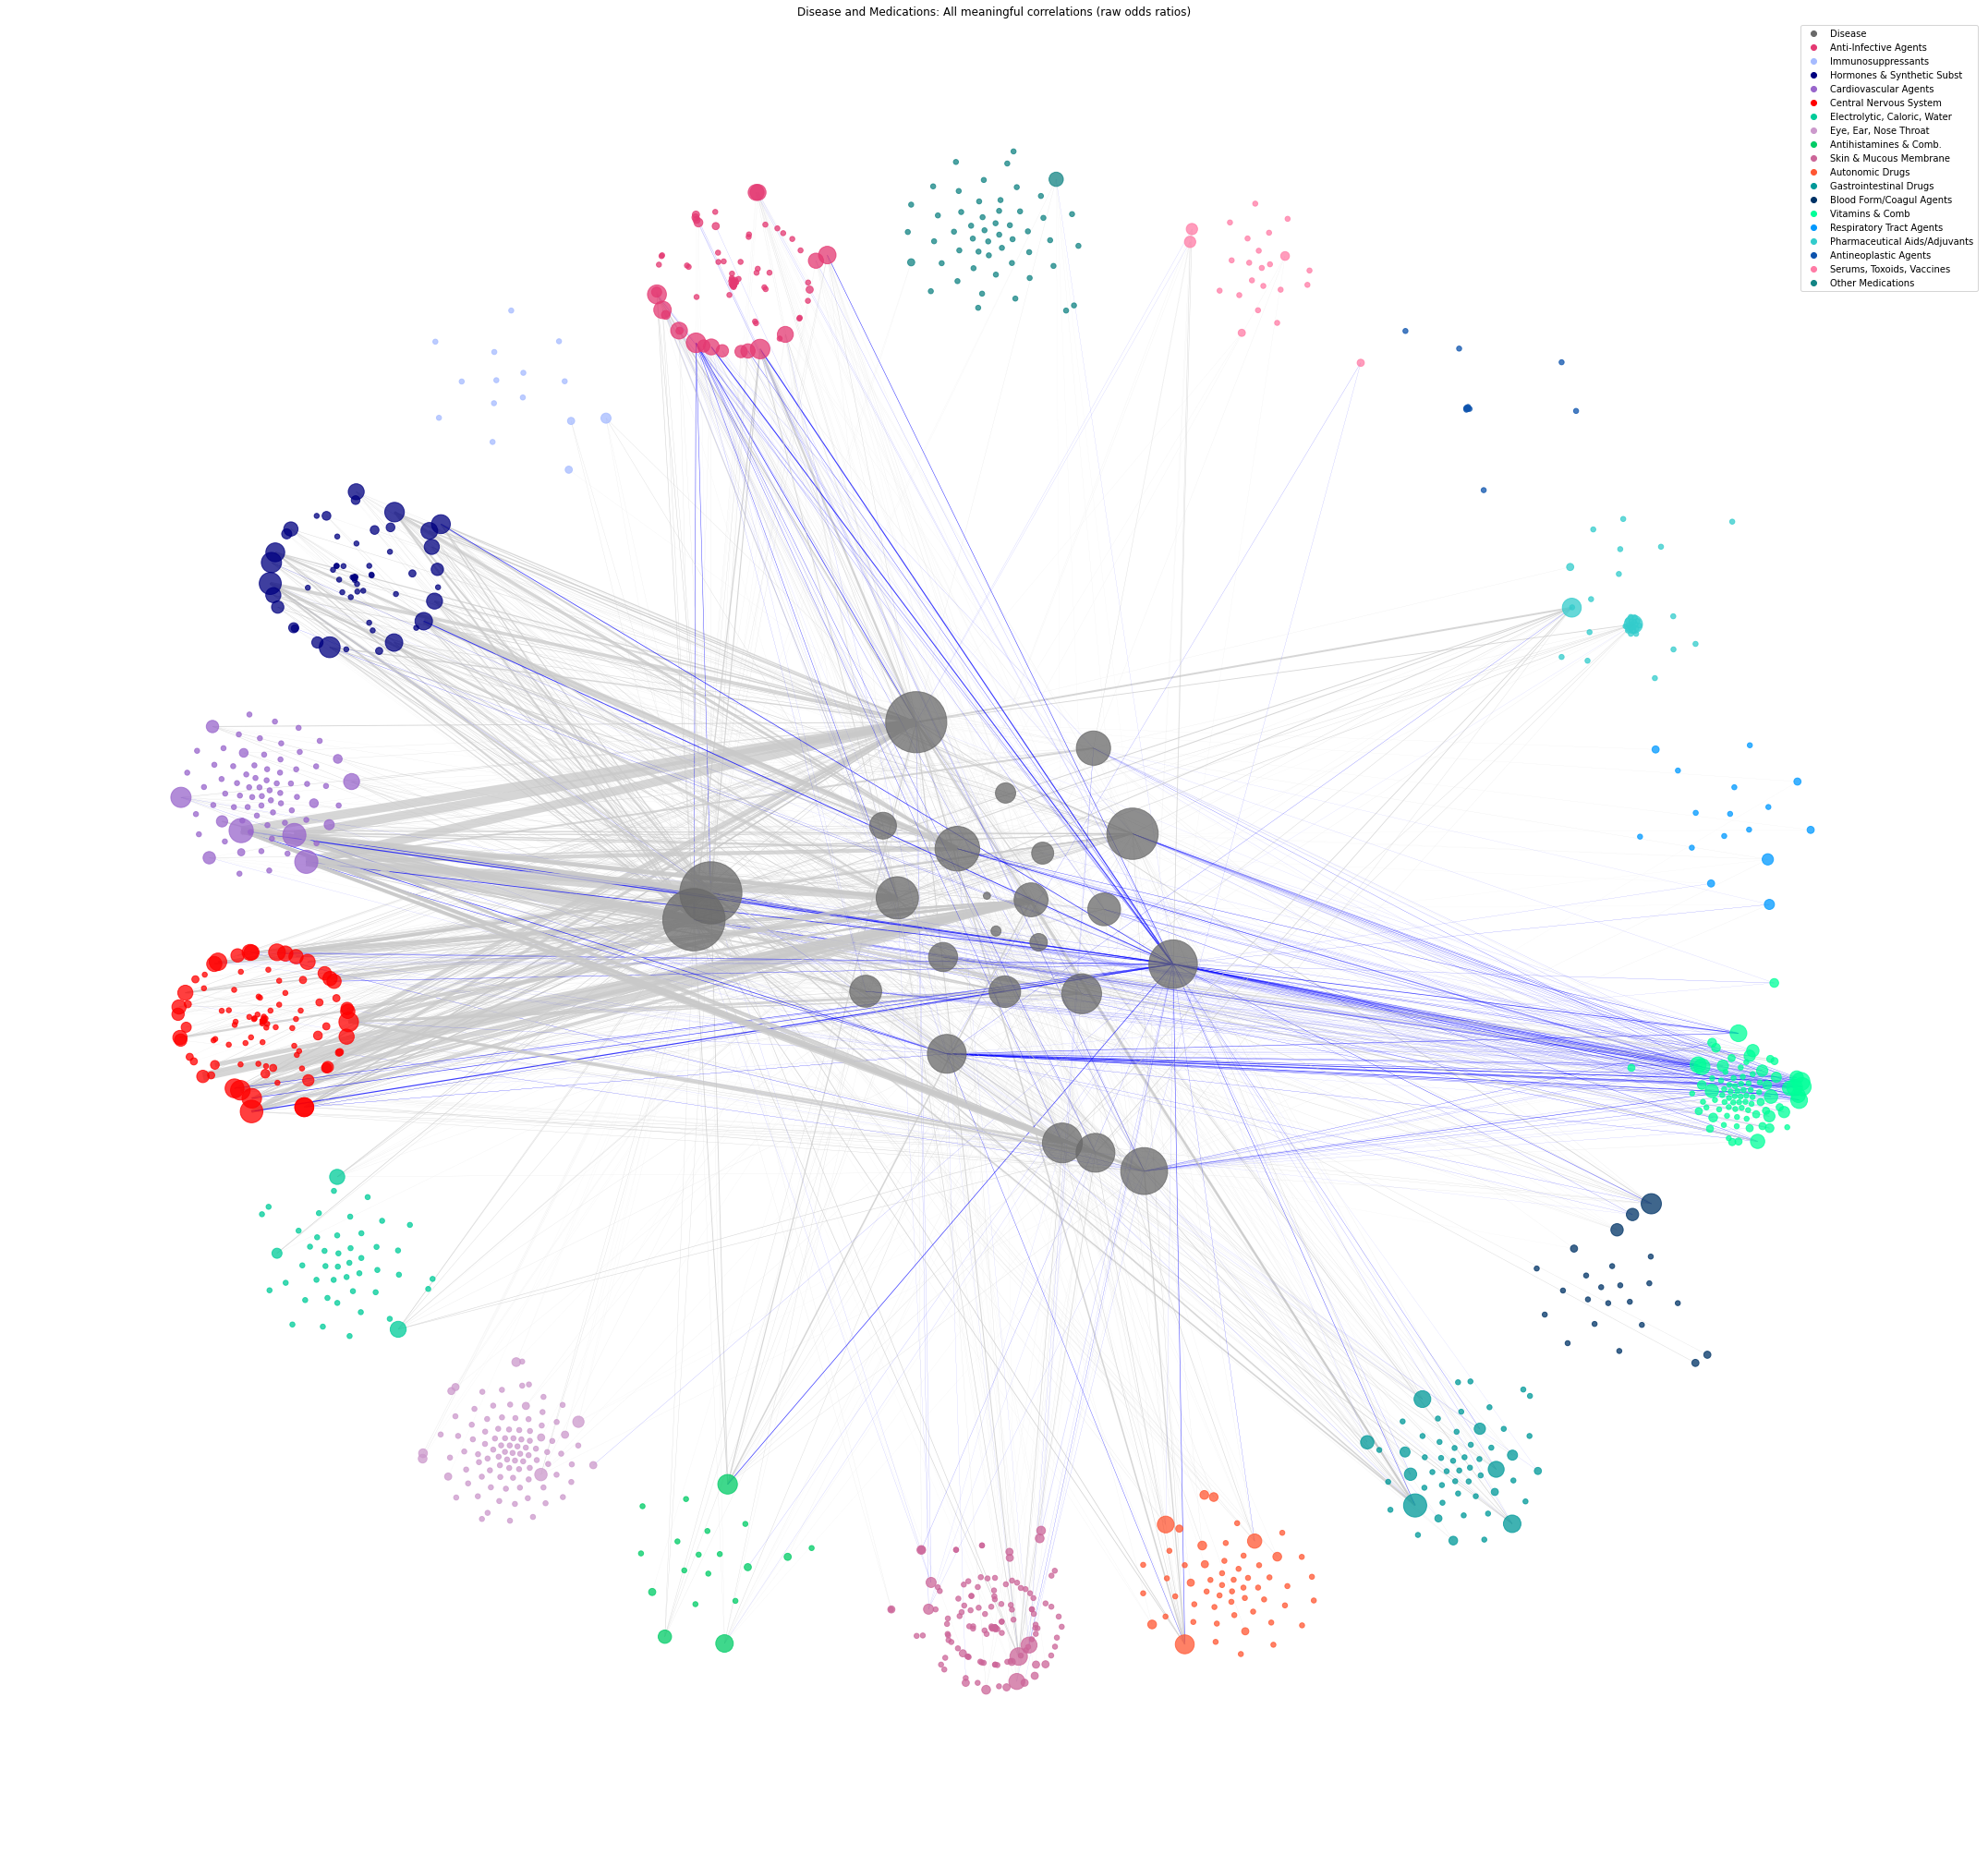

In [ ]:
G=nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)


edge_width = [i['weight_modi'] for i in dict(G.edges).values()]
edge_colors = [i['color'] for i in dict(G.edges).values()]


node_sizes = [i['size']*30 for i in dict(G.nodes).values()]
node_colors = [i['color'] for i in dict(G.nodes).values()]


fixed_nodes = G.nodes()
fixed_positions = nx.get_node_attributes(G,'pos')
pos = nx.spring_layout(G,pos=fixed_positions,fixed=fixed_nodes)


plt.figure(figsize=(30,28)) ## Final Size
nx.draw_networkx(G,pos,node_color=node_colors,node_size=node_sizes,width=edge_width,edge_color=edge_colors,with_labels=False,alpha=0.75)
# nx.draw_networkx_labels(G,pos,imp_labels,font_size=15,font_color='#000000')



plt.title('Disease and Medications: All meaningful correlations (raw odds ratios)')
plt.xlabel('tsne-origin-one')
plt.ylabel('tsne-origin-two')
plt.legend(markers, final_color_dict.keys(), numpoints=1)
plt.axis('off') # Remove the border around
plt.tight_layout()
plt.show()

## needs to add node_size_final!

In [ ]:
"""
Save the adjusted odds ratios for the interactive graph
"""
# ## Final Edge Info to edge_list ##
# adj_edge_list = []
# adj_edge_dict = adj_edge_df.to_dict(orient='index')
# for key in adj_edge_dict.keys():
#     each_edge=(adj_edge_dict[key]['Disease'],adj_edge_dict[key]['Medication'],
#                 {
#                     # 'weight': edge_dict[key]['weight'],
#                     'weight_modi':adj_edge_dict[key]['weight_modi'],
#                     'color': adj_edge_dict[key]['color'],
#                     'color_clicked': adj_edge_dict[key]['color_clicked'],
#                     'odds_ratio':adj_edge_dict[key]['odds ratio'],
#                     'p-val':adj_edge_dict[key]['p-val']
#                 }
#             )
#     adj_edge_list.append(each_edge)

'\nSave the adjusted odds ratios for the interactive graph\n'

In [ ]:
import bokeh
from bokeh.io import output_notebook, show, save,output_file
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine,GraphRenderer,BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, CustomJS, Column, TextInput
from bokeh.plotting import figure
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx
from bokeh.palettes import Spectral4
from bokeh import events

from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, DateFormatter, TableColumn, Row

In [ ]:
raw_edge_df_modi = raw_edge_df.copy()
raw_edge_df_modi['color_clicked_modi'] = np.where(raw_edge_df_modi['color']=='#c9c9c9',raw_edge_df_modi['color_clicked'],'#0000ff')
raw_edge_df_modi['color']='#c9c9c9'
# raw_edge_df.drop(columns=['color_clicked']).rename(columns={'color_cliced_modi':'color_clicked'})
raw_edge_df_modi = raw_edge_df_modi.drop(columns=['color_clicked']).rename(columns={'color_clicked_modi':'color_clicked'})

## Final Edge Info to edge_list ##
edge_list = []
edge_dict = raw_edge_df_modi.to_dict(orient='index')
for key in edge_dict.keys():
    each_edge=(edge_dict[key]['Disease'],edge_dict[key]['Medication'],
                {
                    # 'weight': edge_dict[key]['weight'],
                    'weight_modi':edge_dict[key]['weight_modi'],
                    'color': edge_dict[key]['color'],
                    'color_clicked': edge_dict[key]['color_clicked'],
                    'odds_ratio':edge_dict[key]['odds ratio'],
                    'p-val':edge_dict[key]['p-val']
                }
            )
    edge_list.append(each_edge)

In [ ]:
#Choose a title!
output_notebook()
title = 'PregMedNet Network Graph'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [('Med/Disease', '$index'), ('start', '@start'), ('end', '@end')]
node_hover_tool = [('Node','@index'),('Class','@class')]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = node_hover_tool, title=title,
              tools="pan,wheel_zoom,box_zoom,reset", toolbar_location="above",plot_width=1350,plot_height=1200) #x_range=(-2000, 1700), y_range=(-2000, 4000),xwheel_pan, ywheel_pan,
plot.add_tools(HoverTool(tooltips=node_hover_tool), TapTool(), BoxSelectTool())

G=nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)


# edge_weight = [i['weight_modi'] for i in dict(G.edges).values()]
# edge_color = [i['color'] for i in dict(G.edges).values()]

fixed_nodes = node_dict.keys()
fixed_positions = nx.get_node_attributes(G,'pos')
node_sizes = nx.get_node_attributes(G,'size')
node_colors = nx.get_node_attributes(G,'color')

pos = nx.spring_layout(G,pos=fixed_positions)#,pos=fixed_positions, fixed = fixed_nodes
edge_width = nx.get_edge_attributes(G,'weight_modi')
edge_color = nx.get_edge_attributes(G,'color')
edge_color_click=nx.get_edge_attributes(G,'color_clicked')


nx.set_node_attributes(G, node_colors, 'node_color')
nx.set_node_attributes(G, node_sizes, 'node_size')
nx.set_edge_attributes(G, edge_color, "edge_color")
nx.set_edge_attributes(G, edge_color_click, "edge_color_click")

network_graph = from_networkx(G, nx.spring_layout,pos=fixed_positions, fixed = fixed_nodes,scale=10,center=(0,0))

######## Test #########
network_graph.node_renderer.glyph = Circle(size='node_size', fill_color='node_color')
network_graph.node_renderer.selection_glyph = Circle(size='node_size', fill_color='node_color')
network_graph.node_renderer.hover_glyph = Circle(size='node_size', fill_color='node_color')

network_graph.edge_renderer.data_source.data["line_color"] = [G.get_edge_data(a,b)['color'] for a, b in G.edges()]
network_graph.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.2)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color= "edge_color_click",  line_alpha=1)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color="edge_color_click", line_alpha=1)
network_graph.edge_renderer.data_source.data["line_width"] = [G.get_edge_data(a,b)['weight_modi'] for a, b in G.edges()]
network_graph.edge_renderer.glyph.line_width = {'field': 'line_width'}
network_graph.edge_renderer.selection_glyph.line_width = {'field': 'line_width'}
network_graph.edge_renderer.hover_glyph.line_width = {'field': 'line_width'}

network_graph.selection_policy = NodesAndLinkedEdges()

#Add network graph to the plot
plot.renderers.append(network_graph)


plot.xgrid.visible = False
plot.ygrid.visible = False
plot.axis.visible = False
plot.outline_line_color = None


######### Making interactive tables connected to the networkx ######### gohongyi: https://stackoverflow.com/questions/53603046/get-selected-glyph-from-networkx-graph-in-bokeh
### `data`: data with all edge information. nodes information is merged to include "End Node Class"
Edges_DF = pd.DataFrame.from_dict(G.edges,orient='index').reset_index().rename(columns={'level_0':'start','level_1':'end'})
Nodes_DF = pd.DataFrame.from_dict(G.nodes,orient='index').reset_index()[['index','class']]
data = pd.merge(Edges_DF,Nodes_DF,left_on='end',right_on='index',how='left').drop(columns=['index'],axis=1)

### Making Data Table object in Bokeh using `data`
source = ColumnDataSource(data)
selected_source = ColumnDataSource(dict(indices=[]))
columns = [
        TableColumn(field="start", title="Start"),
        TableColumn(field="end", title="End"),
        TableColumn(field="class", title="End Node Class"),
        TableColumn(field="odds_ratio", title="Odds Ratio"),
        TableColumn(field="p-val", title="p-value"),
    ]

columns_2 = [
        TableColumn(field="start", title="Clicked"),
        TableColumn(field="end", title="Connected"),
        TableColumn(field="class", title="Connected Node Class"),
        TableColumn(field="odds_ratio", title="Odds Ratio"),
        TableColumn(field="p-val", title="p-value"),
    ]

data_table = DataTable(source=source, columns=columns) #, width=600, height=280
data_table_2 = DataTable(source=selected_source, columns=columns_2) 



code ="""
var inds = graph.node_renderer.data_source.selected.indices;
data = pd.concat([data[data['start']==inds],data[data['end']==inds]],axis=0)
source = ColumnDataSource(data)
data_table_2 = DataTable(source=source, columns=columns_2) 
data_table_2.change.emit()
"""
callback = CustomJS(args=dict(graph=network_graph, data=data, data_table_2= data_table_2),code=code)


def data_change_on_click(attr,old,new):
    idx = network_graph.node_renderer.data_source.selected
    data = data.loc[idx,:]
    source = ColumnDataSource(data)
    data_table_2 = DataTable(source=source, columns=columns_2) 
    session.store_objects(data_table_2)

    

# network_graph.node_renderer.data_source.selected.js_on_change('indices',callback) 
network_graph.node_renderer.data_source.selected.on_change('indices',data_change_on_click) #
# selected_src.on_change('data', data_change_on_click)




plot.xgrid.visible = False
plot.ygrid.visible = False
plot.axis.visible = False
plot.outline_line_color = None


test_plot = Column(plot,Row(data_table,data_table_2))
# test_plot = Column(plot)

show(test_plot)



# save(test_plot, filename="Oct10_2022_Interactive_Plot_Benjamini_Hochberg.html")
# save(plot, filename="May13_2022_Interactive_Plot_Benjamini_Hochberg.html")






Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



## Test Data Directory (Debugging the app on Apr/29/2024)

In [8]:
from PregMedNet_Functions import RAW_ODDS_RATIOS, ADJ_ODDS_RATIOS, Interactive_Plot, DDI_Plot


In [9]:
df = RAW_ODDS_RATIOS()

In [10]:
df2 = ADJ_ODDS_RATIOS()

KeyError: 'color'

In [ ]:
from pathlib import Path

# Assuming '2024_reference_tables' is in the current working directory of the notebook
file_path_raw_or = Path('2024_reference_tables/node_tsne.csv')
node_df = pd.read_csv(file_path_raw_or)#.drop(columns=['Unnamed: 0'], axis=1)
node_df

,node,tsne-origin-one,tsne-origin-two,tsne-origin-one-modi,tsne-origin-two-modi,New_Med_Group,color
0,RDS_Baby,-283.862430,785.621150,-135.172586,374.105310,Disease,#696969
1,Jaundice_Baby,557.723600,-991.236450,265.582667,-472.017357,Disease,#696969
2,BPD_OLD_Baby,-1104.627800,3.943340,-526.013238,1.877781,Disease,#696969
3,Other_Resp_Dis_Baby,-1042.165600,110.244450,-496.269333,52.497357,Disease,#696969
4,Kernicterus_Baby,-22.788532,98.633934,-10.851682,46.968540,Disease,#696969
...,...,...,...,...,...,...,...
1171,"Measles virus vaccine live attenuated, Subcuta...",-23.985152,28.844382,472.352220,1230.363926,"Serums, Toxoids, Vaccines",#ff7ca6
1172,"Mumps Virus Vaccine, L, Subcutaneous",-9.591974,35.679071,486.745397,1237.198614,"Serums, Toxoids, Vaccines",#ff7ca6
1173,"Pertussis Vac, Acellular, Intramuscular",-150.000000,77.965487,346.337371,1279.485031,"Serums, Toxoids, Vaccines",#ff7ca6
1174,"Pneumococcal Vaccine Polyvalent, Intramuscular",-29.290228,61.282794,467.047143,1262.802338,"Serums, Toxoids, Vaccines",#ff7ca6


In [ ]:
# file_path_raw_or = Path(__file__).parents[0] / '2024_reference_tables/adj_edges.csv'
file_path_raw_or = Path('2024_reference_tables/adj_edges.csv')
adj_edge_df = pd.read_csv(file_path_raw_or)#.drop(columns=['Unnamed: 0'],axis=1)
adj_edge_df

,Unnamed: 0,Disease,Medication,odds ratio,p-val,weight,weight_modi,color,color_clicked,95% CI (LL),95% CI (UL)
0,0,Postmaturity_Baby,"Azithromycin, Oral",0.150286,1.132043e-118,3.931538,3.931538,#0000ff,#FF0000,0.128016,0.176429
1,1,Postmaturity_Baby,"Amoxicillin, Oral",0.120136,1.211083e-108,3.597228,3.597228,#0000ff,#FF0000,0.099590,0.144922
2,2,Postmaturity_Baby,"Acetaminophen, Oral",0.023928,5.690153e-105,3.474829,3.474829,#0000ff,#FF0000,0.017095,0.033491
3,3,Postmaturity_Baby,"Pertussis Vac, Acellular, Intramuscular",6.494674,9.604402e-76,2.500584,2.500584,#c9c9c9,#FF0000,5.322107,7.925580
4,4,Postmaturity_Baby,"Reduced Diphtheria Toxoid, Intramuscular",6.426049,1.137843e-75,2.498131,2.498131,#c9c9c9,#FF0000,5.271308,7.833749
...,...,...,...,...,...,...,...,...,...,...,...
309,309,Other_Resp_Dis_Baby,"Bupropion, Oral",1.180878,9.924422e-03,0.066776,0.066776,#c9c9c9,#FF0000,1.040686,1.339956
310,310,Jaundice_Baby,"Vitamin B Complex, Oral",0.907335,9.943130e-03,0.066749,0.066749,#0000ff,#FF0000,0.842669,0.976962
311,311,LGA_Baby,"Butalbital, Oral",0.841339,1.008370e-02,0.066546,0.066546,#0000ff,#FF0000,0.737593,0.959677
312,312,Anemia_AOP_Baby,"Valaciclovir, Oral",0.802085,1.063796e-02,0.065771,0.065771,#0000ff,#FF0000,0.677219,0.949974


## Adjusted Odds Ratios: Select and Calculate

In [3]:
%pwd

'/home/ykim824/Interactive_Webapp/Interactive_Webapp'

In [4]:
df = pd.read_csv('2024_reference_tables/final_mother_baby_dyads_data/FINAL_MOM_BABY_DATA_cleaned_May2024.csv')


In [5]:
df = df.set_index('ENROLID_BABY')

In [6]:
df

,Kernicterus_Baby,TTN_Baby,RDS_Baby,Sepsis_Baby,IVH_Baby,GALD_Baby,Seizures_Baby,NEC_Baby,PPHN_Baby,Hypoglycemia_Baby,...,"Zinc oxide, Topical application","Zinc, Oral","Ziprasidone, Oral","Zolmitriptan, Nasal","Zolmitriptan, Oral","Zolpidem, Oral","Zolpidem, Sublingual","Zonisamide, Oral","alpha-Carotene, Oral","alpha-Tocopherol acetate, Route Not Applicable"
ENROLID_BABY,,,,,,,,,,,,,,,,,,,,,
26685197703,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685650404,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685910005,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686268906,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686366804,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682167104,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682899803,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682904303,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
[i for i in df.columns]

['Kernicterus_Baby',
 'TTN_Baby',
 'RDS_Baby',
 'Sepsis_Baby',
 'IVH_Baby',
 'GALD_Baby',
 'Seizures_Baby',
 'NEC_Baby',
 'PPHN_Baby',
 'Hypoglycemia_Baby',
 'NAS_Baby',
 'Arrhythmia_Baby',
 'Pneumonia_Baby',
 'UTI_Baby',
 'Jaundice_Baby',
 'SGA_Baby',
 'LGA_Baby',
 'Postmaturity_Baby',
 'Neonatal_Death_Baby',
 'ROP_Baby',
 'BPD_OLD_Baby',
 'Anemia_AOP_Baby',
 'Anemia_All_Baby',
 'Other_Resp_Dis_Baby',
 'SEX',
 'EGEOLOC_0',
 'EGEOLOC_1',
 'EGEOLOC_2',
 'EGEOLOC_3',
 'EGEOLOC_4',
 'EGEOLOC_5',
 'GESTATIONAL_AGE',
 'AGE_MOM',
 'Anemia_Mom',
 'Asthma_Mom',
 'SUD_Alcohol_Mom',
 'Anxiety_Mom',
 'Bipolar_Disorder_Mom',
 'Cesarean_Section_Mom',
 'PTB_Mom',
 'Autoimmune_Mom',
 'APLS_Mom',
 'STD_Mom',
 'Hyperemesis_Gravidarum_Mom',
 'Headache_Mom',
 'Migraine_Mom',
 'ADHD_Mom',
 'Alcohol_Withdrawal_Mom',
 'Catatonic_Mom',
 'Chronic_Pain_Mom',
 'SUD_Cocaine_Mom',
 'Depression_Mom',
 'Eating_Disorder_Mom',
 'Eclampsia_Mom',
 'Epilepsy_Mom',
 'Infertility_Mom',
 'GDM_Mom',
 'SUD_Hallucinogen_Mom',

In [8]:
baby_list = [i for i in df.columns if i.__contains__('_Baby')]
len(baby_list)
baby_df = df[baby_list]

In [9]:
mom_med = df.loc[:,'5-methyltetrahydrofolic acid, Oral':]

In [10]:
confounders = df.loc[:,'SEX':'SUD_Smoking_Mom']

In [19]:
mom_med

,"5-methyltetrahydrofolic acid, Oral","Abacavir, Oral","Abatacept, Subcutaneous","Acarbose, Oral","Acebutolol, Oral","Acetaminophen, Oral","Acetaminophen, Route Not Applicable","Acetazolamide, Oral","Acetic acid, Otic","Acetic acid, Vaginal",...,"Zinc oxide, Topical application","Zinc, Oral","Ziprasidone, Oral","Zolmitriptan, Nasal","Zolmitriptan, Oral","Zolpidem, Oral","Zolpidem, Sublingual","Zonisamide, Oral","alpha-Carotene, Oral","alpha-Tocopherol acetate, Route Not Applicable"
ENROLID_BABY,,,,,,,,,,,,,,,,,,,,,
26685197703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685650404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685910005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686268906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686366804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682167104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682899803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682904303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df

,Kernicterus_Baby,TTN_Baby,RDS_Baby,Sepsis_Baby,IVH_Baby,GALD_Baby,Seizures_Baby,NEC_Baby,PPHN_Baby,Hypoglycemia_Baby,...,"Zinc oxide, Topical application","Zinc, Oral","Ziprasidone, Oral","Zolmitriptan, Nasal","Zolmitriptan, Oral","Zolpidem, Oral","Zolpidem, Sublingual","Zonisamide, Oral","alpha-Carotene, Oral","alpha-Tocopherol acetate, Route Not Applicable"
ENROLID_BABY,,,,,,,,,,,,,,,,,,,,,
26685197703,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685650404,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685910005,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686268906,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686366804,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682167104,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682899803,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682904303,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
import os

file_path = '2024_reference_tables/final_mother_baby_dyads_data/FINAL_MOM_BABY_DATA_cleaned_May2024.csv'
file_size = os.path.getsize(file_path)
file_size_kb = file_size / 1024  # Convert bytes to kilobytes
file_size_mb = file_size_kb / 1024  # Convert kilobytes to megabytes
file_size_gb = file_size_mb / 1024  # Convert megabytes to gigabytes

print(f"File size: {file_size} bytes")
print(f"File size: {file_size_kb:.2f} KB")
print(f"File size: {file_size_mb:.2f} MB")
print(f"File size: {file_size_gb:.4f} GB")


File size: 3951057482 bytes
File size: 3858454.57 KB
File size: 3768.02 MB
File size: 3.6797 GB


In [28]:
df.shape[0]/2

408701.0

In [35]:
df1 = df.iloc[:408701,:]
df2 = df.iloc[408701:,:]

In [49]:
file_path_df1 = '2024_reference_tables/final_mother_baby_dyads_data/FINAL_MOM_BABY_DATA_DF1.csv'
file_path_df2 = '2024_reference_tables/final_mother_baby_dyads_data/FINAL_MOM_BABY_DATA_DF2.csv'

In [50]:
pd.read_csv(file_path_df1)

,ENROLID_BABY,Kernicterus_Baby,TTN_Baby,RDS_Baby,Sepsis_Baby,IVH_Baby,GALD_Baby,Seizures_Baby,NEC_Baby,PPHN_Baby,...,"Zinc oxide, Topical application","Zinc, Oral","Ziprasidone, Oral","Zolmitriptan, Nasal","Zolmitriptan, Oral","Zolpidem, Oral","Zolpidem, Sublingual","Zonisamide, Oral","alpha-Carotene, Oral","alpha-Tocopherol acetate, Route Not Applicable"
0,26685197703,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26685650404,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26685910005,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26686268906,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26686366804,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408696,1748232203,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408697,1758108603,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408698,1785706703,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408699,1788058303,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# df1.to_csv(file_path_df1)
# df2.to_csv(file_path_df2)

In [41]:
import os

file_size = os.path.getsize(file_path_df2)
file_size_kb = file_size / 1024  # Convert bytes to kilobytes
file_size_mb = file_size_kb / 1024  # Convert kilobytes to megabytes
file_size_gb = file_size_mb / 1024  # Convert megabytes to gigabytes

print(f"File size: {file_size} bytes")
print(f"File size: {file_size_kb:.2f} KB")
print(f"File size: {file_size_mb:.2f} MB")
print(f"File size: {file_size_gb:.4f} GB")


File size: 1975476180 bytes
File size: 1929175.96 KB
File size: 1883.96 MB
File size: 1.8398 GB


In [44]:
pd.read_csv(file_path_df1)

,ENROLID_BABY,Kernicterus_Baby,TTN_Baby,RDS_Baby,Sepsis_Baby,IVH_Baby,GALD_Baby,Seizures_Baby,NEC_Baby,PPHN_Baby,...,"Zinc oxide, Topical application","Zinc, Oral","Ziprasidone, Oral","Zolmitriptan, Nasal","Zolmitriptan, Oral","Zolpidem, Oral","Zolpidem, Sublingual","Zonisamide, Oral","alpha-Carotene, Oral","alpha-Tocopherol acetate, Route Not Applicable"
0,26685197703,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26685650404,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26685910005,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26686268906,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26686366804,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408696,1748232203,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408697,1758108603,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408698,1785706703,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408699,1788058303,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
pd.concat([df1,df2])

,Kernicterus_Baby,TTN_Baby,RDS_Baby,Sepsis_Baby,IVH_Baby,GALD_Baby,Seizures_Baby,NEC_Baby,PPHN_Baby,Hypoglycemia_Baby,...,"Zinc oxide, Topical application","Zinc, Oral","Ziprasidone, Oral","Zolmitriptan, Nasal","Zolmitriptan, Oral","Zolpidem, Oral","Zolpidem, Sublingual","Zonisamide, Oral","alpha-Carotene, Oral","alpha-Tocopherol acetate, Route Not Applicable"
ENROLID_BABY,,,,,,,,,,,,,,,,,,,,,
26685197703,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685650404,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26685910005,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686268906,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26686366804,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682167104,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682899803,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26682904303,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
type(os.getcwd())

str

## Test out med/dz id crosswalk

In [2]:
dz_id_df = pd.read_csv('2024_reference_tables/disease_id_crosswalk.csv').drop(columns=['Unnamed: 0'])
med_id_df = pd.read_csv('2024_reference_tables/medication_id_crosswalk.csv').drop(columns=['Unnamed: 0'])


In [3]:
med_dz_pair = pd.read_csv('2024_reference_tables/adj_edges.csv')[['Disease','Medication']]

In [4]:
med_dz_pair

,Disease,Medication
0,Postmaturity_Baby,"Azithromycin, Oral"
1,Postmaturity_Baby,"Amoxicillin, Oral"
2,Postmaturity_Baby,"Acetaminophen, Oral"
3,Postmaturity_Baby,"Pertussis Vac, Acellular, Intramuscular"
4,Postmaturity_Baby,"Reduced Diphtheria Toxoid, Intramuscular"
...,...,...
309,Other_Resp_Dis_Baby,"Bupropion, Oral"
310,Jaundice_Baby,"Vitamin B Complex, Oral"
311,LGA_Baby,"Butalbital, Oral"
312,Anemia_AOP_Baby,"Valaciclovir, Oral"


/tmp/ipykernel_13610/2351116107.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  kg = pd.read_csv('2024_reference_tables/kg.csv')


In [7]:
kg = pd.read_csv('2024_reference_tables/kg.csv')
"""
Generate the disease id crosswalk
"""
kg_dz_x = kg[['x_type','x_id','x_name']].drop_duplicates().rename(columns={'x_type':'node_type','x_id':'node_id','x_name':'node_name'}) ##[kg['x_type']=='disease']
kg_dz_y = kg[['y_type','y_id','y_name']].drop_duplicates().rename(columns={'y_type':'node_type','y_id':'node_id','y_name':'node_name'}) ##[kg['y_type']=='disease']
dz_node_df = pd.concat([kg_dz_x,kg_dz_y],axis=0).drop_duplicates().reset_index().drop(columns=['index'])
dz_node_df
dz_list = [
'neonatal abstinence syndrome',
'Neonatal hypoglycemia',
'bronchopulmonary dysplasia',
'neonatal jaundice',
'Large for gestational age',
'Neonatal death',
'newborn respiratory distress syndrome',
'Neonatal sepsis',
'Small for gestational age',
'Retinopathy of prematurity', 'retinopathy of prematurity',
'neonatal urinary tract infectious disease',
'Intraventricular hemorrhage',
'Neonatal seizure',
'neonatal anemia',
'anemia of prematurity'
]
marketscan_names = ['Postmaturity_Baby',
 'NAS_Baby',
 'Hypoglycemia_Baby',
 'TTN_Baby',
 'BPD_OLD_Baby',
 'Other_Resp_Dis_Baby',
 'Jaundice_Baby',
 'LGA_Baby',
 'Neonatal_Death_Baby',
 'RDS_Baby',
 'Pneumonia_Baby',
 'Sepsis_Baby',
 'SGA_Baby',
 'ROP_Baby',
 'Arrhythmia_Baby',
 'UTI_Baby',
 'IVH_Baby',
 'Seizures_Baby',
 'Anemia_All_Baby',
 'Anemia_AOP_Baby']

kg_names = [
np.nan,
'neonatal abstinence syndrome',
'Neonatal hypoglycemia',
np.nan,
'bronchopulmonary dysplasia',
np.nan,
'neonatal jaundice',
'Large for gestational age',
'Neonatal death',
'newborn respiratory distress syndrome',
np.nan,
'Neonatal sepsis',
'Small for gestational age',
['Retinopathy of prematurity', 'retinopathy of prematurity'],
np.nan,
'neonatal urinary tract infectious disease',
'Intraventricular hemorrhage',
'Neonatal seizure',
'neonatal anemia',
'anemia of prematurity'
]

data ={'MarketScan':marketscan_names,'PrimeKG':kg_names}
dz_name_df = pd.DataFrame(data)
dz_name_df
dz_name_df = dz_name_df.explode('PrimeKG').reset_index().drop(columns=['index'])

dz_node_df = dz_node_df.rename(columns={'node_name':'PrimeKG'})
dz_name_id_df = pd.merge(dz_name_df,dz_node_df,on='PrimeKG',how='left')
dz_name_id_df

,MarketScan,PrimeKG,node_type,node_id
0,Postmaturity_Baby,NaN,NaN,NaN
1,NAS_Baby,neonatal abstinence syndrome,disease,5566
2,Hypoglycemia_Baby,Neonatal hypoglycemia,effect/phenotype,1998
3,Hypoglycemia_Baby,Neonatal hypoglycemia,effect/phenotype,1998
4,TTN_Baby,NaN,NaN,NaN
5,BPD_OLD_Baby,bronchopulmonary dysplasia,disease,19091
6,Other_Resp_Dis_Baby,NaN,NaN,NaN
7,Jaundice_Baby,neonatal jaundice,disease,6584
8,LGA_Baby,Large for gestational age,effect/phenotype,1520
9,LGA_Baby,Large for gestational age,effect/phenotype,1520


,Disease,Medication
0,Postmaturity_Baby,"Azithromycin, Oral"
1,Postmaturity_Baby,"Amoxicillin, Oral"
2,Postmaturity_Baby,"Acetaminophen, Oral"
3,Postmaturity_Baby,"Pertussis Vac, Acellular, Intramuscular"
4,Postmaturity_Baby,"Reduced Diphtheria Toxoid, Intramuscular"
...,...,...
309,Other_Resp_Dis_Baby,"Bupropion, Oral"
310,Jaundice_Baby,"Vitamin B Complex, Oral"
311,LGA_Baby,"Butalbital, Oral"
312,Anemia_AOP_Baby,"Valaciclovir, Oral"


In [12]:
dz_name_id_df

,MarketScan,PrimeKG,node_type,node_id
0,Postmaturity_Baby,NaN,NaN,NaN
1,NAS_Baby,neonatal abstinence syndrome,disease,5566
2,Hypoglycemia_Baby,Neonatal hypoglycemia,effect/phenotype,1998
3,Hypoglycemia_Baby,Neonatal hypoglycemia,effect/phenotype,1998
4,TTN_Baby,NaN,NaN,NaN
5,BPD_OLD_Baby,bronchopulmonary dysplasia,disease,19091
6,Other_Resp_Dis_Baby,NaN,NaN,NaN
7,Jaundice_Baby,neonatal jaundice,disease,6584
8,LGA_Baby,Large for gestational age,effect/phenotype,1520
9,LGA_Baby,Large for gestational age,effect/phenotype,1520


In [14]:
dz_name_id_df['PrimeKG'].unique()

array([nan, 'neonatal abstinence syndrome', 'Neonatal hypoglycemia',
       'bronchopulmonary dysplasia', 'neonatal jaundice',
       'Large for gestational age', 'Neonatal death',
       'newborn respiratory distress syndrome', 'Neonatal sepsis',
       'Small for gestational age', 'Retinopathy of prematurity',
       'retinopathy of prematurity',
       'neonatal urinary tract infectious disease',
       'Intraventricular hemorrhage', 'Neonatal seizure',
       'neonatal anemia', 'anemia of prematurity'], dtype=object)

In [18]:
# newdf = df.replace(50, 60)
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('neonatal abstinence syndrome','Neonatal Abstinence Syndrome (NAS)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Neonatal hypoglycemia','Neonatal Hypoglycemia')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('bronchopulmonary dysplasia','Bronchopulmonary Dysplasia (BPD)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('neonatal jaundice','Neonatal Jaundice')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Large for gestational age','Large for Gestational Age (LGA)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Neonatal death','Neonatal Death')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('newborn respiratory distress syndrome','Newborn Respiratory Distress Syndrome (RDS)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Neonatal sepsis','Neonatal Sepsis')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Small for gestational age','Small for Gestational Age (SGA)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Retinopathy of prematurity','Retinopathy of Prematurity (ROP)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('retinopathy of prematurity','Retinopathy of Prematurity (ROP)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('neonatal urinary tract infectious disease','neonatal urinary tract infection (UTI)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Intraventricular hemorrhage','Intraventricular Hemorrhage (IVH)')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('Neonatal seizure','Neonatal Seizure')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('neonatal anemia','Neonatal Anemia')
dz_name_id_df['PrimeKG'] = dz_name_id_df['PrimeKG'].replace('anemia of prematurity','Anemia of Prematurity (AOP)')




In [19]:
dz_name_id_df

,MarketScan,PrimeKG,node_type,node_id
0,Postmaturity_Baby,NaN,NaN,NaN
1,NAS_Baby,Neonatal Abstinence Syndrome (NAS),disease,5566
2,Hypoglycemia_Baby,Neonatal Hypoglycemia,effect/phenotype,1998
3,Hypoglycemia_Baby,Neonatal Hypoglycemia,effect/phenotype,1998
4,TTN_Baby,NaN,NaN,NaN
5,BPD_OLD_Baby,Bronchopulmonary Dysplasia (BPD),disease,19091
6,Other_Resp_Dis_Baby,NaN,NaN,NaN
7,Jaundice_Baby,Neonatal Jaundice,disease,6584
8,LGA_Baby,Large for Gestational Age (LGA),effect/phenotype,1520
9,LGA_Baby,Large for Gestational Age (LGA),effect/phenotype,1520


In [ ]:
dz_name_id_df['node_id'].unique()
med_id_df
med_dz_pair

In [26]:
merge_df_v1 = pd.merge(med_dz_pair,med_id_df,on='Medication',how='left').rename(columns={'DrugBank ID':'med_id'})
merge_df_v1

,Disease,Medication,med_id
0,Postmaturity_Baby,"Azithromycin, Oral",DB00207
1,Postmaturity_Baby,"Amoxicillin, Oral",DB01060
2,Postmaturity_Baby,"Acetaminophen, Oral",DB00316
3,Postmaturity_Baby,"Pertussis Vac, Acellular, Intramuscular",NaN
4,Postmaturity_Baby,"Reduced Diphtheria Toxoid, Intramuscular",YK00016
...,...,...,...
309,Other_Resp_Dis_Baby,"Bupropion, Oral",DB01156
310,Jaundice_Baby,"Vitamin B Complex, Oral",YK00003
311,LGA_Baby,"Butalbital, Oral",DB00241
312,Anemia_AOP_Baby,"Valaciclovir, Oral",DB00577


In [35]:
dz_name_id_df_to_merge = dz_name_id_df.rename(columns={'MarketScan':'Disease','PrimeKG':'dz_name_display','node_id':'dz_id'})
dz_name_id_df_to_merge

,Disease,dz_name_display,node_type,dz_id
0,Postmaturity_Baby,NaN,NaN,NaN
1,NAS_Baby,Neonatal Abstinence Syndrome (NAS),disease,5566
2,Hypoglycemia_Baby,Neonatal Hypoglycemia,effect/phenotype,1998
3,Hypoglycemia_Baby,Neonatal Hypoglycemia,effect/phenotype,1998
4,TTN_Baby,NaN,NaN,NaN
5,BPD_OLD_Baby,Bronchopulmonary Dysplasia (BPD),disease,19091
6,Other_Resp_Dis_Baby,NaN,NaN,NaN
7,Jaundice_Baby,Neonatal Jaundice,disease,6584
8,LGA_Baby,Large for Gestational Age (LGA),effect/phenotype,1520
9,LGA_Baby,Large for Gestational Age (LGA),effect/phenotype,1520


In [36]:
merge_df_v2 = pd.merge(merge_df_v1,dz_name_id_df_to_merge,on='Disease',how='left')
merge_df_v2

,Disease,Medication,med_id,dz_name_display,node_type,dz_id
0,Postmaturity_Baby,"Azithromycin, Oral",DB00207,NaN,NaN,NaN
1,Postmaturity_Baby,"Amoxicillin, Oral",DB01060,NaN,NaN,NaN
2,Postmaturity_Baby,"Acetaminophen, Oral",DB00316,NaN,NaN,NaN
3,Postmaturity_Baby,"Pertussis Vac, Acellular, Intramuscular",NaN,NaN,NaN,NaN
4,Postmaturity_Baby,"Reduced Diphtheria Toxoid, Intramuscular",YK00016,NaN,NaN,NaN
...,...,...,...,...,...,...
381,LGA_Baby,"Butalbital, Oral",DB00241,Large for Gestational Age (LGA),effect/phenotype,1520
382,LGA_Baby,"Butalbital, Oral",DB00241,Large for Gestational Age (LGA),effect/phenotype,1520
383,Anemia_AOP_Baby,"Valaciclovir, Oral",DB00577,Anemia of Prematurity (AOP),disease,1239
384,Hypoglycemia_Baby,"Omega-3 fatty acids, Oral",DB11133,Neonatal Hypoglycemia,effect/phenotype,1998


In [41]:
dz_med_pair_final = merge_df_v2[~merge_df_v2['med_id'].isna()][~merge_df_v2['dz_id'].isna()][~merge_df_v2['node_type'].isna()].reset_index().drop(columns=['index'])
dz_med_pair_final

/tmp/ipykernel_13610/1174900007.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dz_med_pair_final = merge_df_v2[~merge_df_v2['med_id'].isna()][~merge_df_v2['dz_id'].isna()][~merge_df_v2['node_type'].isna()].reset_index().drop(columns=['index'])
/tmp/ipykernel_13610/1174900007.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dz_med_pair_final = merge_df_v2[~merge_df_v2['med_id'].isna()][~merge_df_v2['dz_id'].isna()][~merge_df_v2['node_type'].isna()].reset_index().drop(columns=['index'])


,Disease,Medication,med_id,dz_name_display,node_type,dz_id
0,NAS_Baby,"Acetaminophen, Oral",DB00316,Neonatal Abstinence Syndrome (NAS),disease,5566
1,Hypoglycemia_Baby,"Glyburide, Oral",DB01016,Neonatal Hypoglycemia,effect/phenotype,1998
2,Hypoglycemia_Baby,"Glyburide, Oral",DB01016,Neonatal Hypoglycemia,effect/phenotype,1998
3,NAS_Baby,"Oxycodone, Oral",DB00497,Neonatal Abstinence Syndrome (NAS),disease,5566
4,BPD_OLD_Baby,"Sertraline, Oral",DB01104,Bronchopulmonary Dysplasia (BPD),disease,19091
...,...,...,...,...,...,...
236,LGA_Baby,"Butalbital, Oral",DB00241,Large for Gestational Age (LGA),effect/phenotype,1520
237,LGA_Baby,"Butalbital, Oral",DB00241,Large for Gestational Age (LGA),effect/phenotype,1520
238,Anemia_AOP_Baby,"Valaciclovir, Oral",DB00577,Anemia of Prematurity (AOP),disease,1239
239,Hypoglycemia_Baby,"Omega-3 fatty acids, Oral",DB11133,Neonatal Hypoglycemia,effect/phenotype,1998


In [42]:
dz_med_pair_final.to_csv('2024_reference_tables/mechanism_dz_med_df.csv')

In [51]:
disease = 'Neonatal Abstinence Syndrome (NAS)'
medication = 'Oxycodone, Oral'


## Build a network based on the neonatal complications and maternal medications that we extracted

In [55]:
sel_dz_id_list = list(dz_med_pair_final[dz_med_pair_final['dz_name_display']==disease]['dz_id'].unique())
sel_dz_id_list

['5566']

In [62]:
sel_med_id_list=list(dz_med_pair_final[dz_med_pair_final['Medication']==medication]['med_id'].unique())
sel_med_id_list

['DB00497']

## Start to build a network graph

In [64]:
kg = pd.read_csv('2024_reference_tables/kg.csv')

/tmp/ipykernel_13610/2351116107.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  kg = pd.read_csv('2024_reference_tables/kg.csv')


In [65]:
sel_relation = [
    'drug_protein',
    'protein_protein',
    'disease_protein',
    'bioprocess_protein','molfunc_protein','cellcomp_protein',
    'bioprocess_bioprocess','molfunc_molfunc','cellcomp_cellcomp'
]
sel_kg = kg[kg['relation'].isin(sel_relation)].reset_index().drop(columns=['index','x_index','y_index'],axis=1) ## 4.3 million nodes (8.1M previouslydd)
sel_kg

,relation,display_relation,x_id,x_type,x_name,x_source,y_id,y_type,y_name,y_source
0,protein_protein,ppi,9796,gene/protein,PHYHIP,NCBI,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,7918,gene/protein,GPANK1,NCBI,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,8233,gene/protein,ZRSR2,NCBI,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,4899,gene/protein,NRF1,NCBI,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,5297,gene/protein,PI4KA,NCBI,8601,gene/protein,RGS20,NCBI
...,...,...,...,...,...,...,...,...,...,...
1592357,bioprocess_protein,interacts with,32597,biological_process,B cell receptor transport into membrane raft,GO,100133941,gene/protein,CD24,NCBI
1592358,bioprocess_protein,interacts with,32600,biological_process,chemokine receptor transport out of membrane raft,GO,100133941,gene/protein,CD24,NCBI
1592359,bioprocess_protein,interacts with,51494,biological_process,negative regulation of cytoskeleton organization,GO,100505385,gene/protein,IQCJ-SCHIP1,NCBI
1592360,bioprocess_protein,interacts with,90133,biological_process,mesendoderm migration,GO,100506013,gene/protein,APELA,NCBI


In [66]:
sel_kg[sel_kg['x_id'].isin(sel_dz_id_list)] ##'drug_protein'
sel_kg[sel_kg['x_id'].isin(sel_med_id_list)] ##'disease_protein'

,relation,display_relation,x_id,x_type,x_name,x_source,y_id,y_type,y_name,y_source
321257,drug_protein,carrier,DB00497,drug,Oxycodone,DrugBank,213,gene/protein,ALB,NCBI
321836,drug_protein,carrier,DB00497,drug,Oxycodone,DrugBank,5004,gene/protein,ORM1,NCBI
321873,drug_protein,carrier,DB00497,drug,Oxycodone,DrugBank,5005,gene/protein,ORM2,NCBI
322820,drug_protein,enzyme,DB00497,drug,Oxycodone,DrugBank,1577,gene/protein,CYP3A5,NCBI
323112,drug_protein,enzyme,DB00497,drug,Oxycodone,DrugBank,1565,gene/protein,CYP2D6,NCBI
323919,drug_protein,enzyme,DB00497,drug,Oxycodone,DrugBank,1576,gene/protein,CYP3A4,NCBI
330681,drug_protein,target,DB00497,drug,Oxycodone,DrugBank,4985,gene/protein,OPRD1,NCBI
332292,drug_protein,target,DB00497,drug,Oxycodone,DrugBank,4986,gene/protein,OPRK1,NCBI
333436,drug_protein,target,DB00497,drug,Oxycodone,DrugBank,4988,gene/protein,OPRM1,NCBI


In [69]:
sel_sel_relation = [
    # 'drug_protein',
    # 'disease_protein',
    'protein_protein',
    'bioprocess_protein','molfunc_protein','cellcomp_protein',
    'bioprocess_bioprocess','molfunc_molfunc','cellcomp_cellcomp'
]
sel_sel_kg = sel_kg[sel_kg['relation'].isin(sel_sel_relation)]
dz_kg = sel_kg[sel_kg['x_id'].isin(sel_dz_id_list)] ##'drug_protein'
med_kg = sel_kg[sel_kg['x_id'].isin(sel_med_id_list)] ##'disease_protein'
sel_sel_kg = pd.concat([sel_sel_kg,dz_kg,med_kg])
sel_sel_kg

,relation,display_relation,x_id,x_type,x_name,x_source,y_id,y_type,y_name,y_source
0,protein_protein,ppi,9796,gene/protein,PHYHIP,NCBI,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,7918,gene/protein,GPANK1,NCBI,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,8233,gene/protein,ZRSR2,NCBI,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,4899,gene/protein,NRF1,NCBI,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,5297,gene/protein,PI4KA,NCBI,8601,gene/protein,RGS20,NCBI
...,...,...,...,...,...,...,...,...,...,...
323112,drug_protein,enzyme,DB00497,drug,Oxycodone,DrugBank,1565,gene/protein,CYP2D6,NCBI
323919,drug_protein,enzyme,DB00497,drug,Oxycodone,DrugBank,1576,gene/protein,CYP3A4,NCBI
330681,drug_protein,target,DB00497,drug,Oxycodone,DrugBank,4985,gene/protein,OPRD1,NCBI
332292,drug_protein,target,DB00497,drug,Oxycodone,DrugBank,4986,gene/protein,OPRK1,NCBI


In [82]:
summer_color_6 = ['#16AEEF','#946BE1','#FF781E','#FF9F21','#F9CF57','#5DC264']

color_dict = {}
i=0
for type in sel_kg.x_type.unique():
    color_dict[type] = summer_color_6[i]
    i+=1

node_color = pd.DataFrame.from_dict(color_dict,orient='index').reset_index().rename(columns={'index':'x_type',0:'color'})
node_color = node_color.rename(columns={'x_type':'node_type'})
node_color

,node_type,color
0,gene/protein,#16AEEF
1,drug,#946BE1
2,biological_process,#FF781E
3,molecular_function,#FF9F21
4,cellular_component,#F9CF57
5,disease,#5DC264


In [83]:
node_color

pd.DataFrame(['node_type']:)

,node_type,color
0,gene/protein,#16AEEF
1,drug,#946BE1
2,biological_process,#FF781E
3,molecular_function,#FF9F21
4,cellular_component,#F9CF57
5,disease,#5DC264


In [71]:
## make `node_list` based on `sel_sel_kg`
kg_node = sel_sel_kg.drop(columns=['relation','display_relation'],axis=1)

x_nodes = [i for i in kg_node.columns if i.__contains__('x_')]
y_nodes = [i for i in kg_node.columns if i.__contains__('y_')]

x_nodes_new = {}
for i in x_nodes:
    new_name = 'node'+i[1:]
    x_nodes_new[i]=new_name

y_nodes_new = {}
for i in y_nodes:
    new_name = 'node'+i[1:]
    y_nodes_new[i]=new_name

kg_node_x = kg_node[x_nodes].rename(columns=x_nodes_new)
kg_node_y = kg_node[y_nodes].rename(columns=y_nodes_new)
kg_node_merge = pd.concat([kg_node_x,kg_node_y]).drop_duplicates()
kg_node_merge = pd.merge(kg_node_merge,node_color,on='node_type',how='left')
kg_node_merge = kg_node_merge.reset_index().drop(columns=['index'],axis=1)

merging_types = ['gene/protein',  'biological_process', 'molecular_function','cellular_component']
kg_node_merge['node_type_merged']=np.where(kg_node_merge['node_type'].isin(merging_types),'Biology',kg_node_merge['node_type'])
kg_node_merge

node_dict = kg_node_merge.to_dict(orient='index')

node_list = []
for key in node_dict.keys():
    each_node=(node_dict[key]['node_id'],
    {'node_name':node_dict[key]['node_name'],'node_type':node_dict[key]['node_type'],
    'node_source':node_dict[key]['node_source'],'node_color':node_dict[key]['color'],
    'node_type_merged':node_dict[key]['node_type_merged']})
    node_list.append(each_node)


In [72]:
## make `edge_list` based on sel_sel_kg ##
# imp_edges = [(3553, 5515), (3553, '19091'), (1577, 5515), (1577, 'DB00904'), (5515, 5515)]
# imp_edges = [(3553, 5515), (3553, '19091'), (1577, 5515), (1577, 'DB00904'), (5515, 5515)]+[(i[1],i[0]) for i in imp_edges]

edge_df = sel_sel_kg[['relation','display_relation','x_id','y_id']].drop_duplicates()
edge_dict = edge_df.to_dict(orient='index')

edge_list = []
for key in edge_dict.keys():
    test_edge = (edge_dict[key]['x_id'],edge_dict[key]['y_id'])
    # if test_edge in imp_edges:
    #     each_edge = (edge_dict[key]['x_id'],edge_dict[key]['y_id'],
    # {'relation':edge_dict[key]['relation'],'display_relation':edge_dict[key]['display_relation'],'weight':3,'color':'#000000'})
    # else:
    each_edge = (edge_dict[key]['x_id'],edge_dict[key]['y_id'], {'relation':edge_dict[key]['relation'],'display_relation':edge_dict[key]['display_relation'],'weight':0.3,'color':'#ADADAD'})
    edge_list.append(each_edge)
    

In [73]:
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

In [85]:
sel_dz_id_list[0]

'5566'

In [86]:
num = 0
count_nodes = []
for path in nx.all_shortest_paths(G, source=sel_med_id_list[0], target=sel_dz_id_list[0]):
    print(path)
    count_nodes+=path
    num+=1

['DB00497', 1576, 114548, '5566']
['DB00497', 1576, 10273, '5566']
['DB00497', '4988', 84557, '5566']


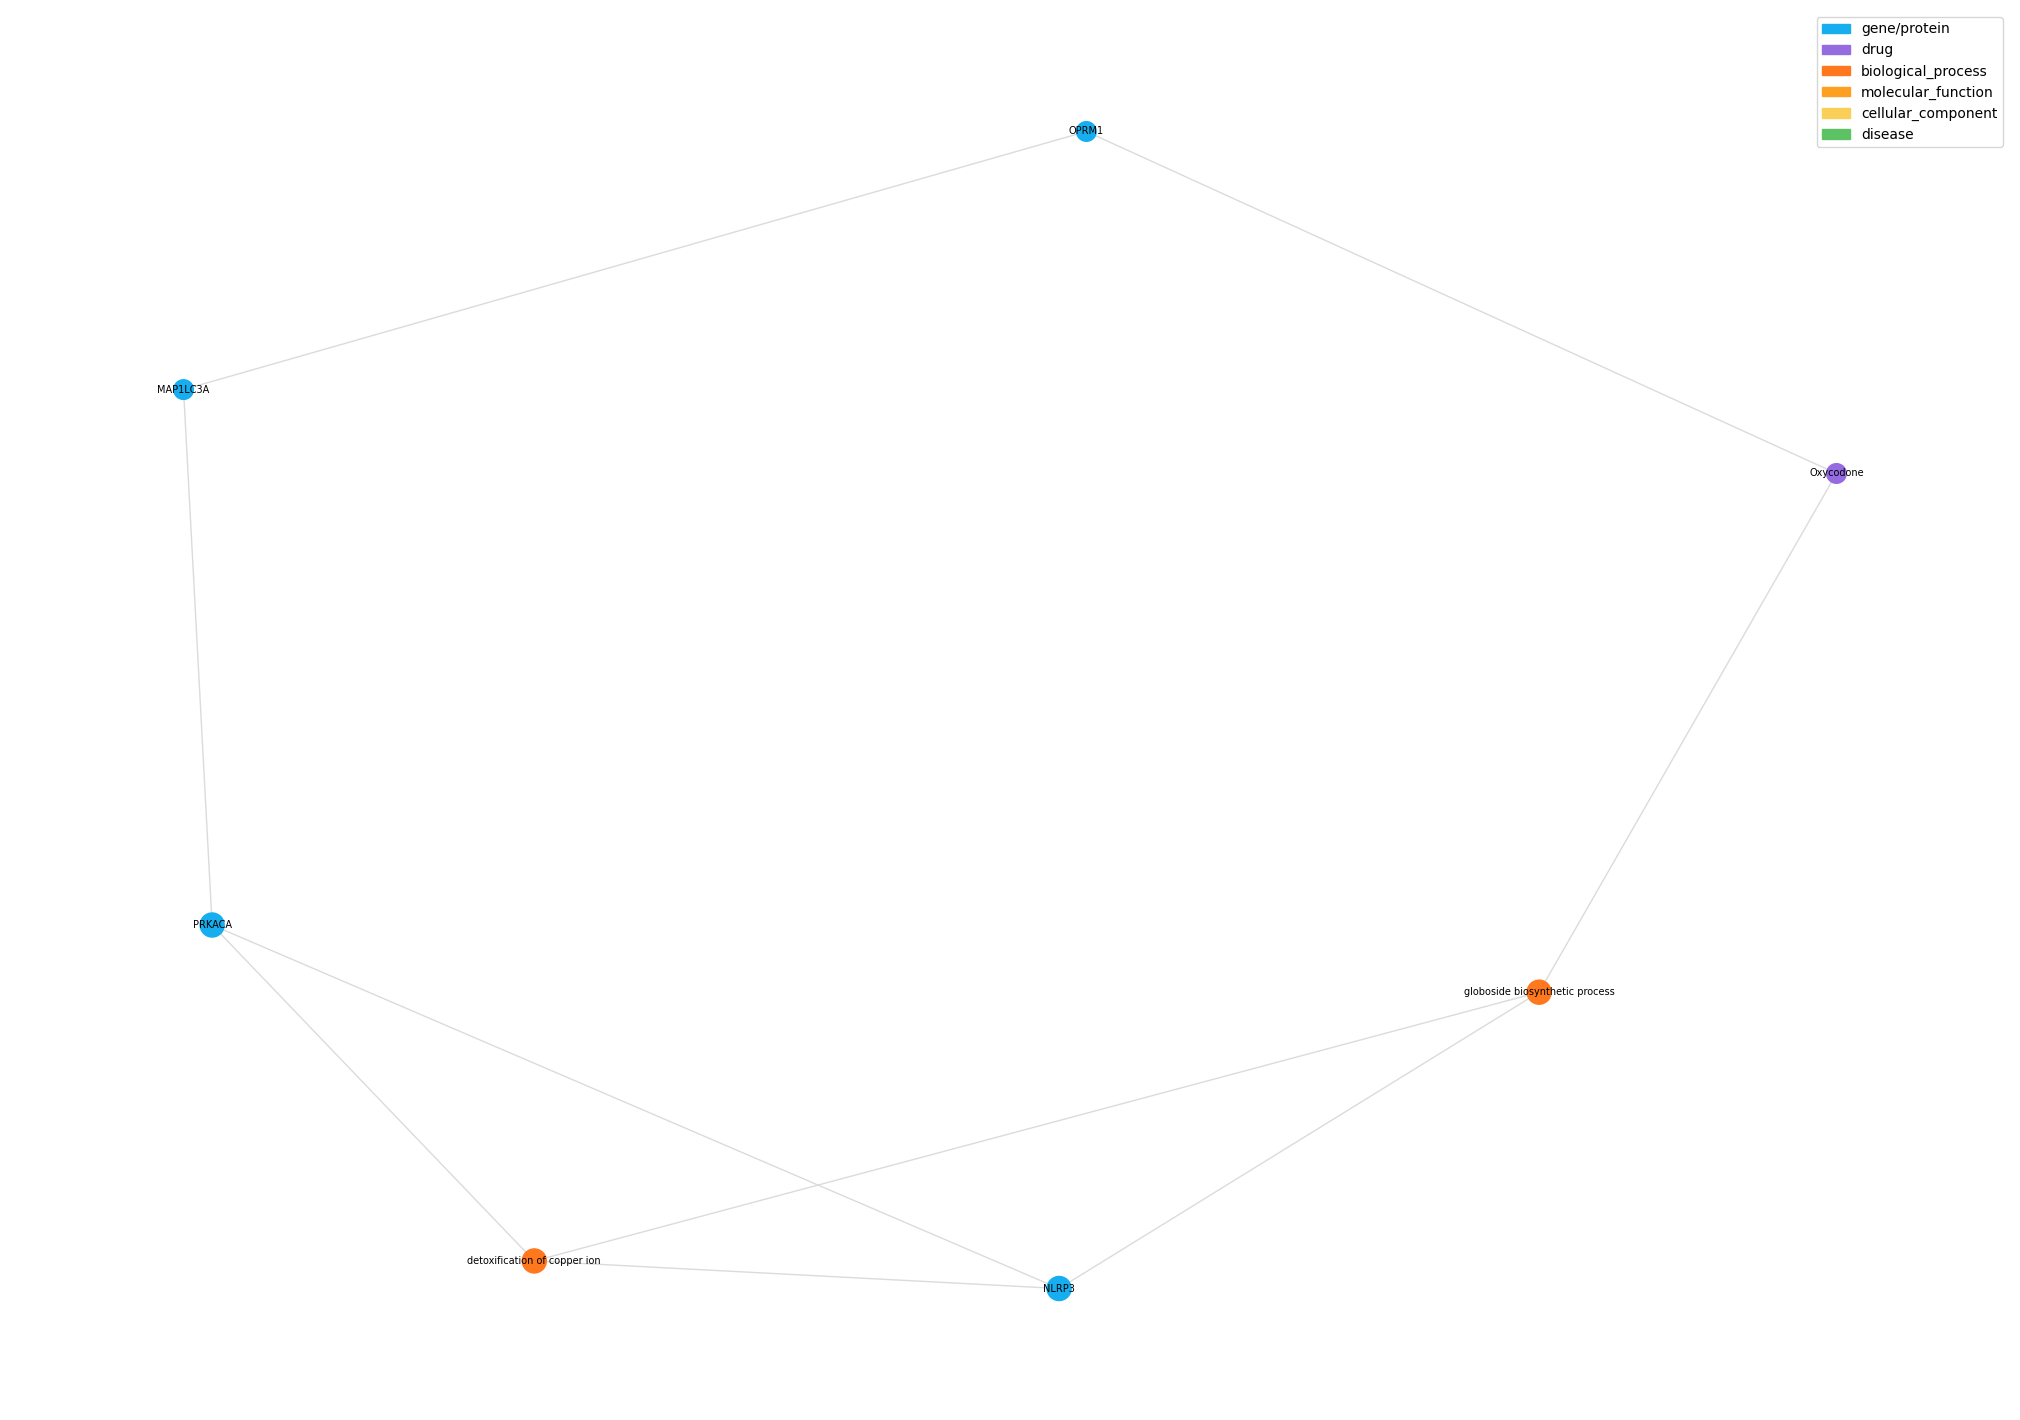

In [87]:
import matplotlib.patches as mpatches #matplotlib.patches.Circle
gene = mpatches.Patch(color='#16AEEF', label='gene/protein')
drug = mpatches.Patch(color='#946BE1', label='drug')
bio = mpatches.Patch(color='#FF781E', label='biological_process')
mole = mpatches.Patch(color='#FF9F21', label='molecular_function')
cell = mpatches.Patch(color='#F9CF57', label='cellular_component')
dz = mpatches.Patch(color='#5DC264', label='disease')

plt.figure(figsize=(20,14))
T= G.subgraph(count_nodes)
node_color = [i['node_color'] for i in dict(T.nodes).values()]
labels = nx.get_node_attributes(T, 'node_name') 
# plt.title(' and Ondansetron')
nx.draw(T,labels=labels,with_labels=True,font_size=7,edge_color='#DBDBDB',node_color=node_color,node_size=[T.degree(n)*100 for n in T.nodes()])
plt.legend(handles=[gene,drug,bio,mole,cell,dz])
plt.show()


## Test & Match the Adjusted Odds Ratios for the New dataframe

In [20]:
prev_edge = pd.read_csv('2024_reference_tables/adj_edges.csv').drop(columns=['Unnamed: 0'],axis=1)
current_edge = pd.read_csv('2024_reference_tables/CORRECTED_ADJ_ODDS_AUG2024.csv').drop(columns=['Unnamed: 0'],axis=1)

In [21]:
prev_edge

,Disease,Medication,odds ratio,p-val,weight,weight_modi,color,color_clicked,95% CI (LL),95% CI (UL)
0,Postmaturity_Baby,"Azithromycin, Oral",0.150286,1.132043e-118,3.931538,3.931538,#0000ff,#FF0000,0.128016,0.176429
1,Postmaturity_Baby,"Amoxicillin, Oral",0.120136,1.211083e-108,3.597228,3.597228,#0000ff,#FF0000,0.099590,0.144922
2,Postmaturity_Baby,"Acetaminophen, Oral",0.023928,5.690153e-105,3.474829,3.474829,#0000ff,#FF0000,0.017095,0.033491
3,Postmaturity_Baby,"Pertussis Vac, Acellular, Intramuscular",6.494674,9.604402e-76,2.500584,2.500584,#c9c9c9,#FF0000,5.322107,7.925580
4,Postmaturity_Baby,"Reduced Diphtheria Toxoid, Intramuscular",6.426049,1.137843e-75,2.498131,2.498131,#c9c9c9,#FF0000,5.271308,7.833749
...,...,...,...,...,...,...,...,...,...,...
309,Other_Resp_Dis_Baby,"Bupropion, Oral",1.180878,9.924422e-03,0.066776,0.066776,#c9c9c9,#FF0000,1.040686,1.339956
310,Jaundice_Baby,"Vitamin B Complex, Oral",0.907335,9.943130e-03,0.066749,0.066749,#0000ff,#FF0000,0.842669,0.976962
311,LGA_Baby,"Butalbital, Oral",0.841339,1.008370e-02,0.066546,0.066546,#0000ff,#FF0000,0.737593,0.959677
312,Anemia_AOP_Baby,"Valaciclovir, Oral",0.802085,1.063796e-02,0.065771,0.065771,#0000ff,#FF0000,0.677219,0.949974


In [24]:
current_edge

adj_or = current_edge.copy()
adj_edge_df = adj_or[['Disease','Medication','odds ratio','p-val','95% CI (LL)','95% CI (UL)']]

adj_edge_df['weight']=-np.log10(adj_edge_df['p-val'])/10
adj_max_weight = np.sort(adj_edge_df['weight'].unique())[-2]
adj_edge_df['weight_modi']=np.where(adj_edge_df['weight']==np.inf,adj_max_weight,adj_edge_df['weight'])
adj_edge_df['color']=np.where(adj_edge_df['odds ratio']<1,'#0000ff','#c9c9c9') #'#0000ff','#c9c9c9'
adj_edge_df['color_clicked']=np.where(adj_edge_df['color']=='#000000','#0000FF','#FF0000')
adj_edge_df

/tmp/ipykernel_106622/2012798742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_edge_df['weight']=-np.log10(adj_edge_df['p-val'])/10
/tmp/ipykernel_106622/2012798742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_edge_df['weight_modi']=np.where(adj_edge_df['weight']==np.inf,adj_max_weight,adj_edge_df['weight'])
/tmp/ipykernel_106622/2012798742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Disease,Medication,odds ratio,p-val,95% CI (LL),95% CI (UL),weight,weight_modi,color,color_clicked
0,NAS_Baby,"Acetaminophen, Oral",4.528976,8.090542e-53,3.732027,5.496109,5.209202,5.209202,#c9c9c9,#FF0000
1,Hypoglycemia_Baby,"Glyburide, Oral",1.885600,4.262557e-46,1.728117,2.057434,4.537033,4.537033,#c9c9c9,#FF0000
2,TTN_Baby,"Fluoxetine, Oral",2.355090,5.546600e-45,2.090251,2.653484,4.425597,4.425597,#c9c9c9,#FF0000
3,NAS_Baby,"Oxycodone, Oral",6.447521,6.049993e-41,4.909144,8.467980,4.021825,4.021825,#c9c9c9,#FF0000
4,BPD_OLD_Baby,"Sertraline, Oral",1.558614,6.878087e-34,1.450806,1.674435,3.316253,3.316253,#c9c9c9,#FF0000
...,...,...,...,...,...,...,...,...,...,...
256,Other_Resp_Dis_Baby,"Insulin lispro, Injection",1.236390,6.377167e-03,1.061546,1.440031,0.219537,0.219537,#c9c9c9,#FF0000
257,Neonatal_Death_Baby,"Folic acid, Oral",0.852219,6.934212e-03,0.758818,0.957117,0.215900,0.215900,#0000ff,#FF0000
258,Pneumonia_Baby,"Ascorbic acid, Oral",0.909797,7.934154e-03,0.848467,0.975560,0.210050,0.210050,#0000ff,#FF0000
259,Hypoglycemia_Baby,"Insulin aspart, Injection",1.289330,8.332312e-03,1.067519,1.557229,0.207923,0.207923,#c9c9c9,#FF0000


In [25]:
# '2024_reference_tables/CORRECTED_ADJ_ODDS_AUG2024.csv'
adj_edge_df.to_csv('2024_reference_tables/adj_edges_modified.csv')